In [1]:
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from datetime import date

# Build URL variables for web scraping

In [3]:
affRefiURL = "https://www.affinityplus.org/rates/mortgage-rates"
rmRefiURL = "https://www.rocketmortgage.com/refinance-rates"
blazeRefiURL = "https://blazecu.com/personal/borrow/mortgage/mortgage-refinance"
magnifiRefiURL = "https://mymagnifi.org/rates/rates-mortgages.html"

In [4]:
# Initialize Chrome webdriver
chrome = webdriver.Chrome()

In [19]:
#1 Get Affinity 30 year refi rate
chrome.get(affRefiURL)
rates = chrome.find_element(By.CLASS_NAME, "ratesTable")
rates_list = rates.text.split("\n")
refi_aff = rates_list[23:29]
aff30refi = refi_aff[2].split(" ")[0]

In [5]:
#2 Get Rocket Mortgage 30 year refi rate
chrome.get(rmRefiURL)

In [6]:
rkt_rates = chrome.find_elements(By.CLASS_NAME, "rkt-Heading-24")

In [7]:
rkt_rates

[<selenium.webdriver.remote.webelement.WebElement (session="e7c75081e28a6ebc6d604ea64c0cecf0", element="f.A5AA191FA6889A7060A86E82F5F04599.d.E8C2AD6EE45FBF30B857CEFD4849F079.e.1093")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e7c75081e28a6ebc6d604ea64c0cecf0", element="f.A5AA191FA6889A7060A86E82F5F04599.d.E8C2AD6EE45FBF30B857CEFD4849F079.e.26")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e7c75081e28a6ebc6d604ea64c0cecf0", element="f.A5AA191FA6889A7060A86E82F5F04599.d.E8C2AD6EE45FBF30B857CEFD4849F079.e.1108")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e7c75081e28a6ebc6d604ea64c0cecf0", element="f.A5AA191FA6889A7060A86E82F5F04599.d.E8C2AD6EE45FBF30B857CEFD4849F079.e.273")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e7c75081e28a6ebc6d604ea64c0cecf0", element="f.A5AA191FA6889A7060A86E82F5F04599.d.E8C2AD6EE45FBF30B857CEFD4849F079.e.1124")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e7c75081e28a6ebc6d

In [13]:
rkt_rates[1].text

'6.875%'

In [ ]:
rktRates = rkt_rates.text.split("\n")
rktRefiRate = rktRates[1]

In [31]:
#3 Get Blaze 30 year refi rate
chrome.get(blazeRefiURL)
blazeRates = chrome.find_element(By.CLASS_NAME, "rates-grid")
blaze30Refi = blazeRates.text.split("\n")[-2:-1]
blaze30Refi_rate = blaze30Refi[0].split(" ")[4]


In [56]:
#4 Get Magnifi 30 year refi rate
chrome.get(magnifiRefiURL)
magnifi = chrome.find_element(By.CLASS_NAME, "table-responsive")
magnifi30Refi = magnifi.text.split("\n")[4].split(" ")[-1:][0]

In [104]:
# Get today's date
rateDate = date.today().strftime("%m/%d/%Y")

In [105]:
rates = [rateDate, aff30refi, rktRefiRate, blaze30Refi_rate, magnifi30Refi]

In [106]:
with open("rates.csv", "a", newline = '') as file:
    writer = csv.writer(file, delimiter = ',')
    writer.writerow(rates)


In [14]:
chrome.close()

# Viz

In [6]:
# VIZ
df = pd.read_csv("refiRates.csv")

In [7]:
df['Affinity Plus'] = df['Affinity Plus'].apply(lambda x: float(x.replace("%", "")))
df['Rocket Mortgage'] = df['Rocket Mortgage'].apply(lambda x: float(x.replace("%", "")))
df['Blaze Credit Union'] = df['Blaze Credit Union'].apply(lambda x: float(x.replace("%", "")))
df['Magnifi'] = df['Magnifi'].apply(lambda x: float(x.replace("%", "")))

In [4]:
df.set_index('Date', inplace = True)

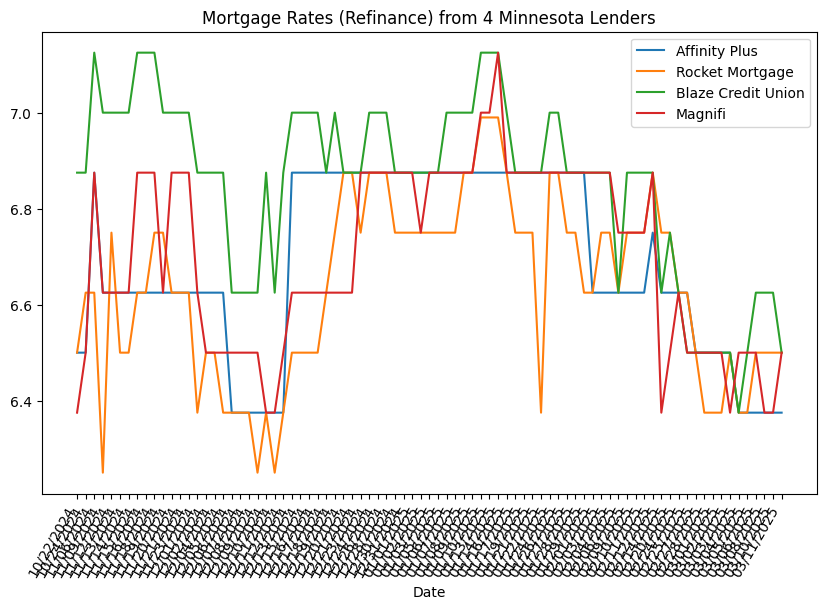

In [8]:
df.plot(kind = 'line', x = 'Date', figsize = (10,6))
plt.xticks(range(len(df['Date'])), df['Date'])
plt.xticks(rotation = 60, ha = 'right')
plt.title("Mortgage Rates (Refinance) from 4 Minnesota Lenders")
plt.show()
